

# Project: THE MOVIE DATABASE(TMDb) DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    The TDMB dataset is movies data collected from the year 1966 to 2015. The different columns in the dataset is ID, Imdb_Id, popularity, budget, revenue, original title movie, cast, homepage, director, movie tagline, overview, runtime, genres, name of production companies, release date, vote count, average vote count, release year, budget adjusted, and revenue adjusted.

### Question(s) for Analysis

    The movie dataset provides ample information to conduct different analyses. The question for data analysis in which we are going to work is how has the budget changed over the years and do other variables correlate with the budget?

We need to import packages to work with dataset.

In [3]:
#importing packages such as numpy, pandas, matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

    Data wrangling is the process of inspecting the structure of data and analyzing the data for cleaning to make data useful for analysis. We will inspect the TMDB dataset, using various codes to find different information about the data and make the dataset ready for the data cleaning process

Let's import the csv file to read the data

In [4]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


The first few rows, last few rows, and size of the table can be checked by using the below code.

In [4]:
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [64]:
df.shape

(10866, 21)

To understand the data better, it is important to know the general statistic, the data types, the count of unique elements, and information about the table.

In [65]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [66]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [67]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The information above shows there are no null cells in the table we will be working with. The homepage, keywords, production companies, and cast columns have null values, but we are not using those columns for our current statistical analysis.
     
Next data should be checked for any duplicate row below code can help us do the same.


In [69]:
sum(df.duplicated())

1

There is one duplicate row in the dataset that can be dropped in the data cleaning process.

By dropping the columns not required for analyses we can extract the only columns required for analysis which makes it easy to work with.

In [70]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Plotting all the columns in the graph gives us a better picture to understand the dataset.

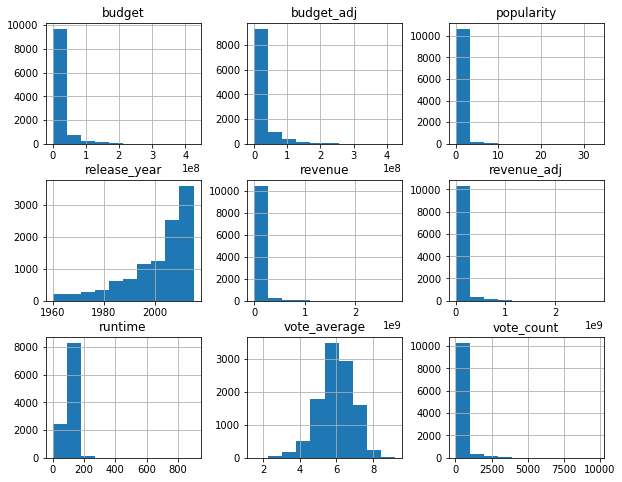

In [71]:
df.hist(figsize=(10,8));

Once we are done with the data wrangling steps such as checking for missing values, duplicate rows and checking all the columns have the right data type. We can move to the next step, clean the data as per our findings, and requirements.


### Data Cleaning

    Data cleaning is the next step after data wrangling. Once we are done with the data wrangling steps such as checking for missing values, duplicate rows and checking all the columns have the right data type. We can move to the next step, clean the data as per our findings, and requirements.
    In the cleaning process, we will drop the duplicate row. We do not have any missing values in any column that we are working with, so there is no need to fill the cell with mean values.

In [5]:
df.drop_duplicates(inplace=True)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

    Once the data is wrangled and cleaned now it is ready for statistical analysis. It is time to explore the statistical analysis and present the analysis in the graph for easy understanding.

### Research Question: 1. How has the budget changed over the years and do other variables correlate with the budget?

Let us analyze the distribution of single variable.We are using budget in this case.

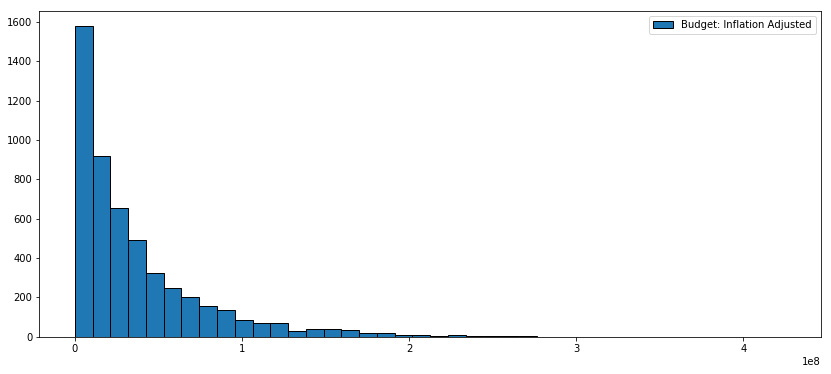

In [9]:
df.query('budget_adj>0')['budget_adj'].hist(grid=False,bins=40,edgecolor='black',figsize=[14,6],label="Budget: Inflation Adjusted");
plt.legend()

The above histogram gives us a clear picture that the budget between zero and less than one hundred million is more compared to the budget of more than one hundred million. After one hundred million the bar declines gradually.

Now, Let us analyze multivariate.In this case we will be using budget and year.We can understand how the budget of movies changed over the year by using a scatter plot. The below scatter chart gives us the visualization of the same.

Text(0.5,1,'Movie Budgets Over The Years')

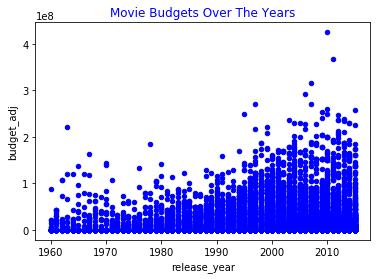

In [5]:
#plotting scatter plot graph for visiualzing budget over the year

df.plot.scatter(x='release_year', y='budget_adj',c='blue')
plt.title('Movie Budgets Over The Years',color='blue')

We can see as the year increase the budget of the movies too increases. while most of the movies are under $200000000. After the year 1990, there is a considerable increase in the budget.

We can analyze the correlation between budget and revenue by calculating the average and represent the same in the line graph.

In [116]:
df1 = df.groupby('release_year',as_index=False)['revenue_adj'].mean()
df2 = df.groupby('release_year',as_index=False)['budget_adj'].mean()

In [117]:
df1.head()

,release_year,revenue_adj
0,1960,3.340991e+07
1,1961,7.947167e+07
2,1962,4.856238e+07
3,1963,3.924580e+07
4,1964,5.707603e+07


In [118]:
df2.head()

,release_year,budget_adj
0,1960,5.082036e+06
1,1961,1.085687e+07
2,1962,1.232693e+07
3,1963,1.535687e+07
4,1964,6.608980e+06


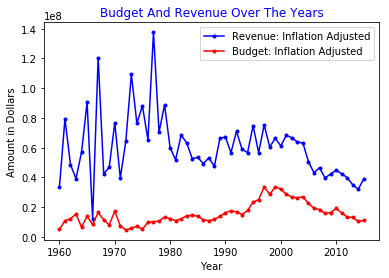

In [120]:
# plotting the line graph 
linegraph1 = plt.plot(df1.release_year,df1.revenue_adj,'b.-',label='Revenue: Inflation Adjusted')
linegraph2 = plt.plot(df2.release_year,df2.budget_adj,'r.-',label='Budget: Inflation Adjusted')
plt.title('Budget And Revenue Over The Years',color='blue')
plt.xlabel('Year')
plt.ylabel('Amount in Dollars')
plt.legend()
plt.show()

In the above line graph, the increase in budget over the year shows the increase in the revenue as well in most cases but not in all cases. In some cases, the budget is low but the revenue is high, in other cases the revenue is high but the budget is low and lastly in very few cases there is not much correlation between budget and revenue.

let us see the correlation between the revenue and budget when we take the average vote in common.

In [122]:
df1 = df.groupby('vote_average',as_index=False)['revenue_adj'].mean()
df2 = df.groupby('vote_average',as_index=False)['budget_adj'].mean()



In [123]:
df1.head()

,vote_average,revenue_adj
0,1.5,0.000000e+00
1,2.0,0.000000e+00
2,2.1,3.505405e+06
3,2.2,2.333395e+04
4,2.3,0.000000e+00


In [124]:
df2.head()

,vote_average,budget_adj
0,1.5,6.382114e+04
1,2.0,0.000000e+00
2,2.1,0.000000e+00
3,2.2,2.057779e+07
4,2.3,0.000000e+00


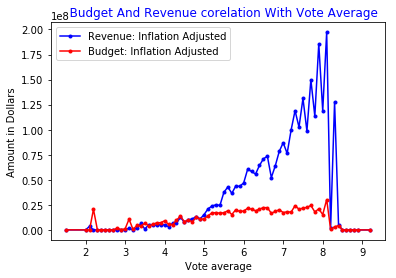

In [125]:
#plotting line graph
linegraph3 = plt.plot(df1.vote_average,df1.revenue_adj,'b.-',label='Revenue: Inflation Adjusted')
linegraph4 = plt.plot(df2.vote_average,df2.budget_adj,'r.-',label='Budget: Inflation Adjusted')

plt.xlabel('Vote average')
plt.ylabel('Amount in Dollars')
plt.title('   Budget And Revenue corelation With Vote Average',color='blue')
plt.legend()
plt.show()

In the above line graph, we can see that when the vote average is high so does the revenue and the budget of the movies in most cases. In some cases, we can see that the vote average does not have a strong correlation between the revenue and budget. A low vote average still generates high revenue and a high budget. The high vote average in some cases shows low revenue and budget.

Along with analyzing the dataset for correlation between different variables, we can also use the TMBD dataset to analyze the top ten movies from the year 1966 to 2015.

In [3]:
# top 10 high budget movies

top_ten = df.nlargest(10, 'budget_adj')
top_ten


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
1389,767,tt0417741,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,http://harrypotter.warnerbros.com/harrypottera...,David Yates,Dark Secrets Revealed,...,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,2.541001e+08,9.492765e+08
8089,9804,tt0114898,1.232098,175000000,264218220,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,NaN,Kevin Reynolds,Beyond the horizon lies the secret to a new be...,...,In a futuristic world where the polar ice caps...,135,Adventure|Action,Universal Pictures|Gordon Company|Davis Entert...,7/28/95,

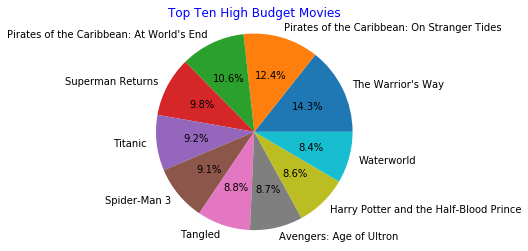

In [37]:
# plotting pie chart
budget_data = top_ten['budget_adj']
movie_labels = top_ten['original_title']


plt.pie(budget_data,labels=movie_labels,autopct='%1.1f%%')
plt.title('Top Ten High Budget Movies',color='blue')
plt.axis('equal')
plt.show()


The above pie chart shows us a clear picture of the top ten high-budget movies and the amount associated with them in percentage.

let us also see the top ten movies with high revenue

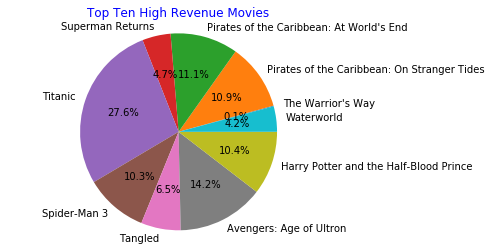

In [39]:
## top 10 high revenue movies

revenue_data = top_ten['revenue_adj']
movie_labels = top_ten['original_title']


plt.pie(revenue_data,labels=movie_labels,autopct='%1.1f%%', startangle=15)
plt.title('Top Ten High Revenue Movies',color= 'blue')
plt.axis('equal')
plt.show()

The above pie chart shows us a clear picture of the top ten high-revenue movies and the cost associated with them is shown in percentage.

Now, let us graph the top movie genres till 2015.

Text(0.5,0,'Movie Genres')

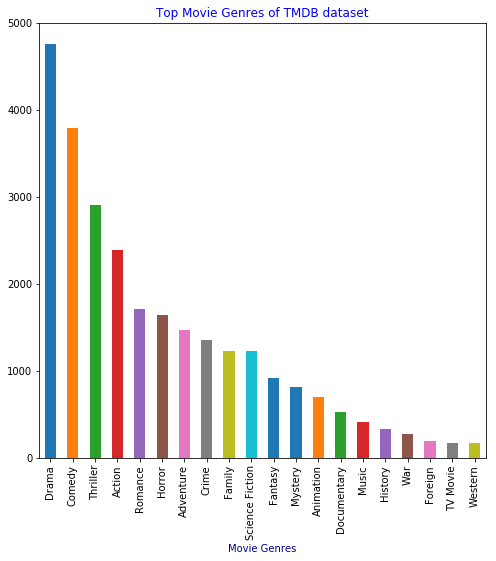

In [13]:
# plotting bar graph
genres_graph = df['genres'].str.cat(sep = '|')
genres_graph = pd.Series(genres_graph.split('|'))
genres_graph.value_counts(ascending= False).plot(kind='bar', figsize=(8,8));
plt.title('Top Movie Genres of TMDB dataset',color='blue')
plt.xlabel('Movie Genres',color='darkblue')


The above bar graph shows that drama, comedy, and thriller are the top three genres in the TMDB dataset.

Now let us see the average of budget, revenue and runtime of the dataset.
Instead of using the same code several times, we can define our function once and call the function to get result using different input. 

In [111]:
# defining a function
def average_eachcoloumn(coloumnavg):
    result = int(df[coloumnavg].mean())
    print('Average of',coloumnavg,':',result)


In [112]:
average_eachcoloumn('budget_adj') 

Average of budget_adj : 17551039


In [113]:
average_eachcoloumn('revenue_adj')

Average of revenue_adj : 51364363


In [114]:
average_eachcoloumn('runtime')

Average of runtime : 102


Let us define a function to calculate the profit for different movies from our dataset.

In [12]:
# defining a function
def profit_or_loss(Movies):
    for index,row in df.iterrows():
        if Movies == row['original_title']:
            result = row['revenue_adj'] - row['budget_adj']
    if result > 0:
        print("Profit made by movie {} : ${}".format(Movies,int(result)))
    else:
        print("Loss incurred by movie {} : ${}".format(Movies,int(result)))

In [13]:
profit_or_loss('Spider-Man 3')

Profit made by movie Spider-Man 3 : $665571205


In [14]:
profit_or_loss('Titanic')

Loss incurred by movie Titanic : $-18072817


In [15]:
profit_or_loss('Aloha')

Loss incurred by movie Aloha : $-9889977


In [16]:
profit_or_loss('Mission: Impossible - Rogue Nation')

Profit made by movie Mission: Impossible - Rogue Nation : $489743512


In [17]:
profit_or_loss('Hotel Transylvania 2')

Profit made by movie Hotel Transylvania 2 : $355288704


In [18]:
profit_or_loss('My Cousin Vinny')

Profit made by movie My Cousin Vinny : $82500897


In [19]:
profit_or_loss('Mortdecai')

Loss incurred by movie Mortdecai : $-27214912


<a id='conclusions'></a>
# Conclusion

    The TMBD dataset was wrangled, cleaned, and then statistically and graphically analyzed with the research question of the budget of the movies over the year. By analyzing the dataset, we were able to find the graphical view of the budget increases over the years, the correlation between budget and revenue over the years, and the correlation between vote average, budget, and revenue. We were also able to analyze the top ten high-budget movies, top ten high-revenue movies, and top genre of the movie dataset in different types of graphs.We calculated average of budget,revenue and runtime by calling the function.We also calculated profit made by each movie by defining the function and calling it with different movie name.

    Lastly, even though the dataset has been thoroughly wrangled, cleaned and ready for statistical and graphical data analysis. There are a few limitations, the budget and revenue are a float data type. With the float data type, the result we get will not be as precise as we are looking for. The amount we considered for analysis was associated with the dollar rate in the year 2010, which might prove our analysis completely inaccurate according to the current dollar rate. The data collected in the past year, for example, from the year 1966-1977 may not be one hundred percent accurate and most of the values were missing in those periods. Despite ignoring all the outlier data analysis done so far has covered many aspects of data useful for making sound business decisions.


## OPTIONAL: Note for the reviewer
 


Completed the Rubric requirements for re-submission.
1) single-variable exploration
2) defined function to avoid repetative code

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])